In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_inventory_data = pd.read_csv('https://drive.google.com/uc?id=1ROCKmRfjHTJ7VZO_nGKX6QI-Qx38moio')
df_majors_data = pd.read_csv('https://drive.google.com/uc?id=1ngUdF7LsiYIZR-6tdxO2WDnsZ_MYBOlX')
df_occupancy_data = pd.read_csv('https://drive.google.com/uc?id=1NQOKHD_dFTDu7UVpSH2a440cnVwMSGtr')
df_persons_data = pd.read_csv('https://drive.google.com/uc?id=1kQXX1HYjZpE4zAaFBSMgrsDPS7wGKtoc')

In [3]:
df_inventory_data.head()

,buildingName,roomName,bedName,bedId
0,Pine Hall,Room-1,Bed-1,2143605e-8854-414b-8ad1-0f0203a370d5
1,Pine Hall,Room-1,Bed-2,31a6601b-3b48-4e65-a064-75fc34cf80ea
2,Pine Hall,Room-2,Bed-1,67522423-d8c3-40d1-94dc-d000efb39064
3,Pine Hall,Room-2,Bed-2,31b16eda-2189-4f0b-89a8-f421ffb55b27
4,Pine Hall,Room-2,Bed-3,67466db1-4544-4812-a08d-147bf7eff4b1


In [4]:
df_majors_data.head()

,id,displayId,name,description
0,12c5d420-9bbc-455d-9794-7780bc5fea5b,d24fcc15-c1ac-46b1-aca8-dc998cf45e78,Computer Science,The study of computers and computational systems.
1,d3d06262-f539-4a05-9e71-6e6113e9529b,1e4c7f9f-40f5-4032-bd44-7036952e3105,Mechanical Engineering,The design and manufacture of mechanical systems.
2,19a8bee2-7566-411a-9919-61d44ccc81ef,c84821a7-9878-46e4-a666-34a538c10aa2,Electrical Engineering,The study of electricity and its applications.
3,b33ae65d-523e-48c6-b10e-59346e1c6523,d92604c6-1626-4794-9cce-cf0a7e136c19,Biology,The study of living organisms.
4,3c0ebd74-4105-4532-a321-39bc3d6ab3d8,7468a134-27ba-4c1e-8b24-8ff51cecfb5c,Chemistry,The study of substances and their properties.


In [5]:
df_occupancy_data.head()

,personId,buildingName,roomName,bedName
0,5594bbf8-f2fe-4a4f-b88f-54df252d0309,Pine Hall,Room-1,Bed-1
1,05ee7cdf-9306-492c-a2d1-3104928640ec,Pine Hall,Room-1,Bed-2
2,4b9c0758-de62-47d6-b78c-f29e754970af,Pine Hall,Room-2,Bed-1
3,045bdbc8-9945-4f75-bf1c-2a8079073d31,Pine Hall,Room-2,Bed-2
4,4b86c4b1-c1e1-4714-9b34-0153654200c1,Pine Hall,Room-2,Bed-3


In [6]:
df_persons_data.head()

,personId,firstName,lastName,email,dob,address,majors
0,7b1fb398-72d7-421e-808c-631a427bfbc4,David,Taylor,david.taylor@example.com,1992-08-15,"767 Walnut St, Georgetown, OH",Communications
1,99a4b233-2804-420b-b757-039f0f3cceb7,Jane,Wilson,jane.wilson@example.com,1969-08-20,"168 Birch St, Riverside, FL","Music, Finance"
2,cc3b2df2-a593-493e-af82-1f0d11c7439b,John,Brown,john.brown@example.com,1967-12-14,"726 Maple St, Fairview, PA",NaN
3,cb669177-4020-4284-a3dc-9a0c312411d4,Linda,Taylor,linda.taylor@example.com,1983-12-04,"171 Spruce St, Riverside, TX","Social Work, Anthropology"
4,ba1443a2-dfeb-441b-b41d-078b36416704,Sarah,Doe,sarah.doe@example.com,1986-08-31,"987 Walnut St, Georgetown, OH","Psychology, Criminal Justice, History, Foreign..."


## DATA CLEANING / Pre-Processing

1. Cleaning and Transforming Persons_data <br>Concatenation of 'firstName' and 'lastName' with a space in between to form the 'name' column. <br>
Removal of the original 'firstName' and 'lastName' columns post-merging to streamline the dataset and avoid redundancy.

In [7]:
df_persons_data['name'] = df_persons_data['firstName'] + ' ' + df_persons_data['lastName']
df_persons_data.drop(['firstName', 'lastName'], axis=1, inplace=True)

In [8]:
df_persons_data.head()

,personId,email,dob,address,majors,name
0,7b1fb398-72d7-421e-808c-631a427bfbc4,david.taylor@example.com,1992-08-15,"767 Walnut St, Georgetown, OH",Communications,David Taylor
1,99a4b233-2804-420b-b757-039f0f3cceb7,jane.wilson@example.com,1969-08-20,"168 Birch St, Riverside, FL","Music, Finance",Jane Wilson
2,cc3b2df2-a593-493e-af82-1f0d11c7439b,john.brown@example.com,1967-12-14,"726 Maple St, Fairview, PA",NaN,John Brown
3,cb669177-4020-4284-a3dc-9a0c312411d4,linda.taylor@example.com,1983-12-04,"171 Spruce St, Riverside, TX","Social Work, Anthropology",Linda Taylor
4,ba1443a2-dfeb-441b-b41d-078b36416704,sarah.doe@example.com,1986-08-31,"987 Walnut St, Georgetown, OH","Psychology, Criminal Justice, History, Foreign...",Sarah Doe


2. Split the Address column

* address1 is usually the primary address line, containing
street number and name. <br>
* address2 is used for additional information like apartment or suite numbers, which is optional and often not present.
<br>
* city, state, and zip are parsed from the latter parts of the address string.

In [9]:
def split_address(row):
    if pd.notna(row['address']):
        parts = row['address'].split(',')
        if len(parts) >= 3:
            row['address1'] = parts[0].strip()
            if len(parts) > 3:
                row['address2'] = ','.join(parts[3:]).strip()
            else:
                row['address2'] = ""
            row['city'] = parts[1].strip()
            state_zip = parts[2].strip().split(' ')
            row['state'] = state_zip[0].strip()
            if len(state_zip) > 1:
                row['zip'] = state_zip[1].strip()
            else:
                row['zip'] = ""

    return row

df_persons_data = df_persons_data.apply(split_address, axis=1)
df_persons_data.drop(['address'], axis=1, inplace=True)


In [10]:
df_persons_data.head()

,personId,email,dob,majors,name,address1,address2,city,state,zip
0,7b1fb398-72d7-421e-808c-631a427bfbc4,david.taylor@example.com,1992-08-15,Communications,David Taylor,767 Walnut St,,Georgetown,OH,
1,99a4b233-2804-420b-b757-039f0f3cceb7,jane.wilson@example.com,1969-08-20,"Music, Finance",Jane Wilson,168 Birch St,,Riverside,FL,
2,cc3b2df2-a593-493e-af82-1f0d11c7439b,john.brown@example.com,1967-12-14,NaN,John Brown,726 Maple St,,Fairview,PA,
3,cb669177-4020-4284-a3dc-9a0c312411d4,linda.taylor@example.com,1983-12-04,"Social Work, Anthropology",Linda Taylor,171 Spruce St,,Riverside,TX,
4,ba1443a2-dfeb-441b-b41d-078b36416704,sarah.doe@example.com,1986-08-31,"Psychology, Criminal Justice, History, Foreign...",Sarah Doe,987 Walnut St,,Georgetown,OH,


#DeDuplicating Email

Using the Group by on email column to generate a new column `row_number` which will help to generate a `new_email` id which is de-duplicated

In [11]:
email_counts_before = df_persons_data['email'].value_counts()
df_persons_data['email'] = df_persons_data['email'].str.lower()
df_persons_data['row_number']=df_persons_data.groupby('email').cumcount()+1
df_persons_data[['prefix', 'domain']] = df_persons_data['email'].str.split('@', expand=True)

df_persons_data['new_email'] = df_persons_data['prefix'] + df_persons_data['row_number'].astype(str) + '@' + df_persons_data['domain']

df_persons_data = df_persons_data.drop(columns=['prefix', 'domain'])

email_counts_after = df_persons_data['new_email'].value_counts()
df_persons_data.head()

,personId,email,dob,majors,name,address1,address2,city,state,zip,row_number,new_email
0,7b1fb398-72d7-421e-808c-631a427bfbc4,david.taylor@example.com,1992-08-15,Communications,David Taylor,767 Walnut St,,Georgetown,OH,,1,david.taylor1@example.com
1,99a4b233-2804-420b-b757-039f0f3cceb7,jane.wilson@example.com,1969-08-20,"Music, Finance",Jane Wilson,168 Birch St,,Riverside,FL,,1,jane.wilson1@example.com
2,cc3b2df2-a593-493e-af82-1f0d11c7439b,john.brown@example.com,1967-12-14,NaN,John Brown,726 Maple St,,Fairview,PA,,1,john.brown1@example.com
3,cb669177-4020-4284-a3dc-9a0c312411d4,linda.taylor@example.com,1983-12-04,"Social Work, Anthropology",Linda Taylor,171 Spruce St,,Riverside,TX,,1,linda.taylor1@example.com
4,ba1443a2-dfeb-441b-b41d-078b36416704,sarah.doe@example.com,1986-08-31,"Psychology, Criminal Justice, History, Foreign...",Sarah Doe,987 Walnut St,,Georgetown,OH,,1,sarah.doe1@example.com


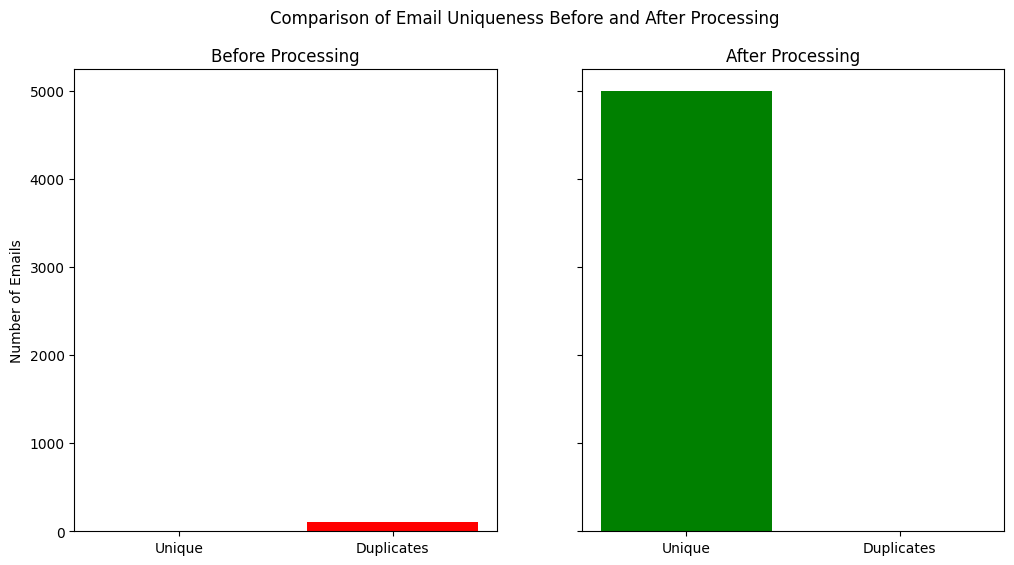

In [12]:
unique_before = (email_counts_before == 1).sum()
duplicates_before = (email_counts_before > 1).sum()

unique_after = (email_counts_after == 1).sum()
duplicates_after = (email_counts_after > 1).sum()

fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
fig.suptitle('Comparison of Email Uniqueness Before and After Processing')

axs[0].bar(['Unique', 'Duplicates'], [unique_before, duplicates_before], color=['green', 'red'])
axs[0].set_title('Before Processing')
axs[0].set_ylabel('Number of Emails')

axs[1].bar(['Unique', 'Duplicates'], [unique_after, duplicates_after], color=['green', 'red'])
axs[1].set_title('After Processing')

plt.show()

#Cleaning data in Majors_Data Table

Firstly lets check if any majors listed in persons_data are missing from majors_data

In [13]:
set_of_majors = set(df_majors_data['name'])
set_of_majors_from_persons = set()
for majors_list in df_persons_data['majors']:
    if pd.notna(majors_list):
        split_majors = majors_list.split(',')
        set_of_majors_from_persons.update([major.strip() for major in split_majors])

if set_of_majors == set_of_majors_from_persons:
    print("True")
else:
    print("False")


True


This table has duplicates in the name and description column. Data might be coming from multiple systems, so we must preserve id and display_id as it might be a foreign key in some other table.


1. Identifying Duplicates: First, identify duplicate entries by examining the name and description columns.
2. Applying Dense Rank: Use the dense_rank() method from pandas, which assigns a rank to each unique major name. The ranking is continuous, meaning no ranks are skipped. This method is beneficial because it ensures that each major is uniquely identifiable.
3. Adding a new column to majors table `major_rank`. This column is unique for each major.

In [15]:
df_majors_data['major_rank'] = df_majors_data['name'].rank(method='dense').astype(int)
major_name_to_id = df_majors_data.set_index('name')['major_rank'].to_dict()
print(major_name_to_id)

{'Computer Science': 10, 'Mechanical Engineering': 28, 'Electrical Engineering': 14, 'Biology': 6, 'Chemistry': 8, 'Physics': 32, 'Mathematics': 27, 'Economics': 12, 'Psychology': 34, 'Sociology': 37, 'History': 21, 'Political Science': 33, 'Philosophy': 31, 'English': 15, 'Education': 13, 'Business Administration': 7, 'Accounting': 1, 'Marketing': 26, 'Finance': 17, 'Art': 5, 'Music': 29, 'Theater': 38, 'Nursing': 30, 'Health Science': 20, 'Environmental Science': 16, 'Geography': 19, 'Anthropology': 3, 'Criminal Justice': 11, 'Social Work': 36, 'Communications': 9, 'Journalism': 22, 'Linguistics': 25, 'Foreign Languages': 18, 'Architecture': 4, 'Urban Planning': 39, 'Agriculture': 2, 'Veterinary Medicine': 40, 'Public Health': 35, 'Law': 23, 'Library Science': 24}


In [16]:
def map_majors_to_ids(majors):
    if pd.notna(majors):
        major_list = [major.strip() for major in majors.split(',')]
        major_ids = [str(major_name_to_id[major]) for major in major_list if major in major_name_to_id]
        return ','.join(major_ids)
    return None

df_persons_data['majorIds'] = df_persons_data['majors'].apply(map_majors_to_ids)
df_persons_data.drop(['majors'], axis=1, inplace=True)
df_persons_data.head()

,personId,email,dob,name,address1,address2,city,state,zip,row_number,new_email,majorIds
0,7b1fb398-72d7-421e-808c-631a427bfbc4,david.taylor@example.com,1992-08-15,David Taylor,767 Walnut St,,Georgetown,OH,,1,david.taylor1@example.com,9
1,99a4b233-2804-420b-b757-039f0f3cceb7,jane.wilson@example.com,1969-08-20,Jane Wilson,168 Birch St,,Riverside,FL,,1,jane.wilson1@example.com,"29,17"
2,cc3b2df2-a593-493e-af82-1f0d11c7439b,john.brown@example.com,1967-12-14,John Brown,726 Maple St,,Fairview,PA,,1,john.brown1@example.com,None
3,cb669177-4020-4284-a3dc-9a0c312411d4,linda.taylor@example.com,1983-12-04,Linda Taylor,171 Spruce St,,Riverside,TX,,1,linda.taylor1@example.com,"36,3"
4,ba1443a2-dfeb-441b-b41d-078b36416704,sarah.doe@example.com,1986-08-31,Sarah Doe,987 Walnut St,,Georgetown,OH,,1,sarah.doe1@example.com,"34,11,21,18,5"


#Joining Occupancy_data and Inventory Data

We perform a left join because we are interested in the bedID of occupied beds by students.

In [17]:
df_merged_occupancy = df_occupancy_data.merge(df_inventory_data, on=['buildingName', 'roomName', 'bedName'], how='left')
df_merged_occupancy.head()

,personId,buildingName,roomName,bedName,bedId
0,5594bbf8-f2fe-4a4f-b88f-54df252d0309,Pine Hall,Room-1,Bed-1,2143605e-8854-414b-8ad1-0f0203a370d5
1,05ee7cdf-9306-492c-a2d1-3104928640ec,Pine Hall,Room-1,Bed-2,31a6601b-3b48-4e65-a064-75fc34cf80ea
2,4b9c0758-de62-47d6-b78c-f29e754970af,Pine Hall,Room-2,Bed-1,67522423-d8c3-40d1-94dc-d000efb39064
3,045bdbc8-9945-4f75-bf1c-2a8079073d31,Pine Hall,Room-2,Bed-2,31b16eda-2189-4f0b-89a8-f421ffb55b27
4,4b86c4b1-c1e1-4714-9b34-0153654200c1,Pine Hall,Room-2,Bed-3,67466db1-4544-4812-a08d-147bf7eff4b1


We perform a left join again between Persons_data and Merged_occupancy_data as we are interested in the bedId for the given person_ids in the Persons table.

In [18]:
df_persons_data = df_persons_data.merge(df_merged_occupancy[['personId', 'bedId']], on='personId', how='left')

In [19]:
df_persons_data.head()
# persons_data.drop(['firstName','lastName'], axis=1, inplace=True)


,personId,email,dob,name,address1,address2,city,state,zip,row_number,new_email,majorIds,bedId
0,7b1fb398-72d7-421e-808c-631a427bfbc4,david.taylor@example.com,1992-08-15,David Taylor,767 Walnut St,,Georgetown,OH,,1,david.taylor1@example.com,9,NaN
1,99a4b233-2804-420b-b757-039f0f3cceb7,jane.wilson@example.com,1969-08-20,Jane Wilson,168 Birch St,,Riverside,FL,,1,jane.wilson1@example.com,"29,17",NaN
2,cc3b2df2-a593-493e-af82-1f0d11c7439b,john.brown@example.com,1967-12-14,John Brown,726 Maple St,,Fairview,PA,,1,john.brown1@example.com,None,a32b34cf-0356-4739-ab43-4a9ed70818f8
3,cb669177-4020-4284-a3dc-9a0c312411d4,linda.taylor@example.com,1983-12-04,Linda Taylor,171 Spruce St,,Riverside,TX,,1,linda.taylor1@example.com,"36,3",01f250f6-a3a3-492b-ba52-3f53f4483316
4,ba1443a2-dfeb-441b-b41d-078b36416704,sarah.doe@example.com,1986-08-31,Sarah Doe,987 Walnut St,,Georgetown,OH,,1,sarah.doe1@example.com,"34,11,21,18,5",f8ef5ea9-e2bf-4eda-9d7a-c7cdf30dc649


Dropping irrelevant columns and final cleanup from df_persons_data

In [20]:
df_persons_data.drop(['row_number','email'], axis=1, inplace=True)
df_persons_data.rename(columns={'new_email': 'email'}, inplace=True)
new_order = ['personId', 'name', 'email', 'dob', 'address1', 'address2', 'city', 'state', 'zip', 'majorIds', 'bedId']
df_persons_data = df_persons_data[new_order]
df_persons_data.head()

,personId,name,email,dob,address1,address2,city,state,zip,majorIds,bedId
0,7b1fb398-72d7-421e-808c-631a427bfbc4,David Taylor,david.taylor1@example.com,1992-08-15,767 Walnut St,,Georgetown,OH,,9,NaN
1,99a4b233-2804-420b-b757-039f0f3cceb7,Jane Wilson,jane.wilson1@example.com,1969-08-20,168 Birch St,,Riverside,FL,,"29,17",NaN
2,cc3b2df2-a593-493e-af82-1f0d11c7439b,John Brown,john.brown1@example.com,1967-12-14,726 Maple St,,Fairview,PA,,None,a32b34cf-0356-4739-ab43-4a9ed70818f8
3,cb669177-4020-4284-a3dc-9a0c312411d4,Linda Taylor,linda.taylor1@example.com,1983-12-04,171 Spruce St,,Riverside,TX,,"36,3",01f250f6-a3a3-492b-ba52-3f53f4483316
4,ba1443a2-dfeb-441b-b41d-078b36416704,Sarah Doe,sarah.doe1@example.com,1986-08-31,987 Walnut St,,Georgetown,OH,,"34,11,21,18,5",f8ef5ea9-e2bf-4eda-9d7a-c7cdf30dc649


#Explanation for Excluding Rows from the Final Dataset

1. Exclusion Based on Missing Major Information: <br>**Rationale**: If the focus of the analysis is on students and their majors, rows without majorIds are not useful as they do not contribute to the analysis of academic disciplines. Including these rows could skew results or lead to incomplete insights about the distribution of majors, their popularity, or correlations with other factors like academic performance.<br>**Action**: Exclude rows where majorIds is null.

2. Exclusion Based on Missing Housing Information:<br>**Rationale**: In analyses focusing on housing situations, such as on-campus accommodation, the bedId is essential. Rows without bedId indicate that the student might be staying off-campus, which is outside the scope of an on-campus housing analysis.<br>**Action**: Exclude rows where bedId is null.

In [21]:
output_csv_path = '/content/output_persons.csv'
df_persons_data.to_csv(output_csv_path, index=False)

missing_majors_data = df_persons_data[df_persons_data['majorIds'].isna()]
issues_csv_path = '/content/missing_majors.csv'
missing_majors_data.to_csv(issues_csv_path, index=False)

missing_housing_data = df_persons_data[df_persons_data['bedId'].isna()]
issues_csv_path_1 = '/content/missing_housing.csv'
missing_housing_data.to_csv(issues_csv_path_1, index=False)